In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')

In [ ]:
#getting into the data
train_df = pd.read_csv('/var/exoTrain.csv')
train_df.head(10)

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,2,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,2,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,2,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,2,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54
5,2,211.10,163.57,179.16,187.82,188.46,168.13,203.46,178.65,166.49,...,-98.45,30.34,30.34,29.62,28.80,19.27,-43.90,-41.63,-52.90,-16.16
6,2,9.34,49.96,33.30,9.63,37.64,20.85,4.54,22.42,10.11,...,-58.56,9.93,9.93,23.50,5.28,-0.44,10.90,-11.77,-9.25,-36.69
7,2,238.77,262.16,277.80,190.16,180.98,123.27,103.95,50.70,59.91,...,-72.48,31.77,31.77,53.48,27.88,95.30,48.86,-10.62,-112.02,-229.92
8,2,-103.54,-118.97,-108.93,-72.25,-61.46,-50.16,-20.61,-12.44,1.48,...,43.92,7.24,7.24,-7.45,-18.82,4.53,21.95,26.94,34.08,44.65
9,2,-265.91,-318.59,-335.66,-450.47,-453.09,-561.47,-606.03,-712.72,-685.97,...,3671.03,2249.28,2249.28,2437.78,2584.22,3162.53,3398.28,3648.34,3671.97,3781.91


In [ ]:
#checking the shape of training data
train_df.shape


(5087, 3198)

In [ ]:
#checking for missing values
train_df[train_df.isnull().any(axis=1)]

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197


<Axes: >

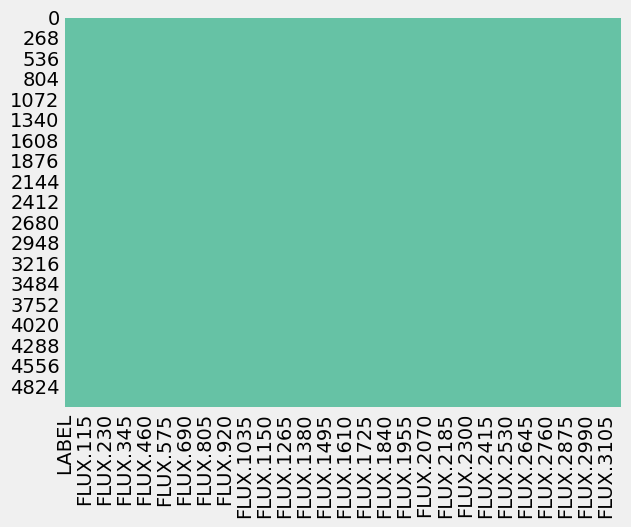

In [ ]:
sns.heatmap(train_df.isnull(),cmap='Set2',cbar=False)

In [ ]:
#decoding labels in the data
#check how many labels in the data
train_df['LABEL'].unique()

array([2, 1])

In [ ]:
#extract the index for the stars labelled as 2
index_label2=list(train_df[train_df["LABEL"]==2].index)
print(f"index list for label 2 star in the data:\n{index_label2}\n")

index list for label 2 star in the data:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36]



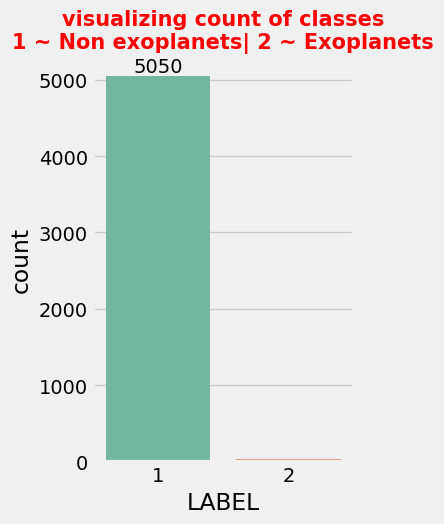

In [ ]:
#visualize thses values using countplot
plt.figure(figsize =(3,5))
visualize_train=sns.countplot(x='LABEL',data=train_df,palette ='Set2')
visualize_train.bar_label(visualize_train.containers[0])
plt.title("visualizing count of classes\n1 ~ Non exoplanets| 2 ~ Exoplanets",fontsize=15,color='red',weight='bold')
plt.show()

In [ ]:
# Replacing labels
train_df = train_df.replace({'LABEL' : {1:0, 2:1}})
print("Replacing labels...")

# Check the labels now
print("Done!\n")
uniq_val = train_df['LABEL'].unique()
print(uniq_val)


Replacing labels...
Done!

[1 0]


In [ ]:
#drop label column to plot only the flux values
plot_df = train_df.drop(['LABEL'], axis=1)

#extract x-axis values from column names
col_names = list(plot_df.columns)
time= [int(flux_prefix.replace("FLUX.","")) for flux_prefix in col_names]
#define a function to plot a flux variation for a given star
def flux_plot(df,candidate,exo=True):
  color ='b' if exo ==True else 'm'
  plt.figure(figsize=(15,5))
  plt.plot(time,df.iloc[candidate-1],linewidth=5,color=color)
  #set the tittle based on whether ithass an exoplanet
  title1, clr1 =f"flux variation of star {candidate} with Exoplanets",'olive'
  title2,clr2 = f"flux variation of star {candidate} without exoplanets",'tab:red'
  plt.title(title1,color=clr1) if exo ==True else plt.title(title2,color=clr2)
  plt.xlabel("time")
  plt.ylabel("flux variations")


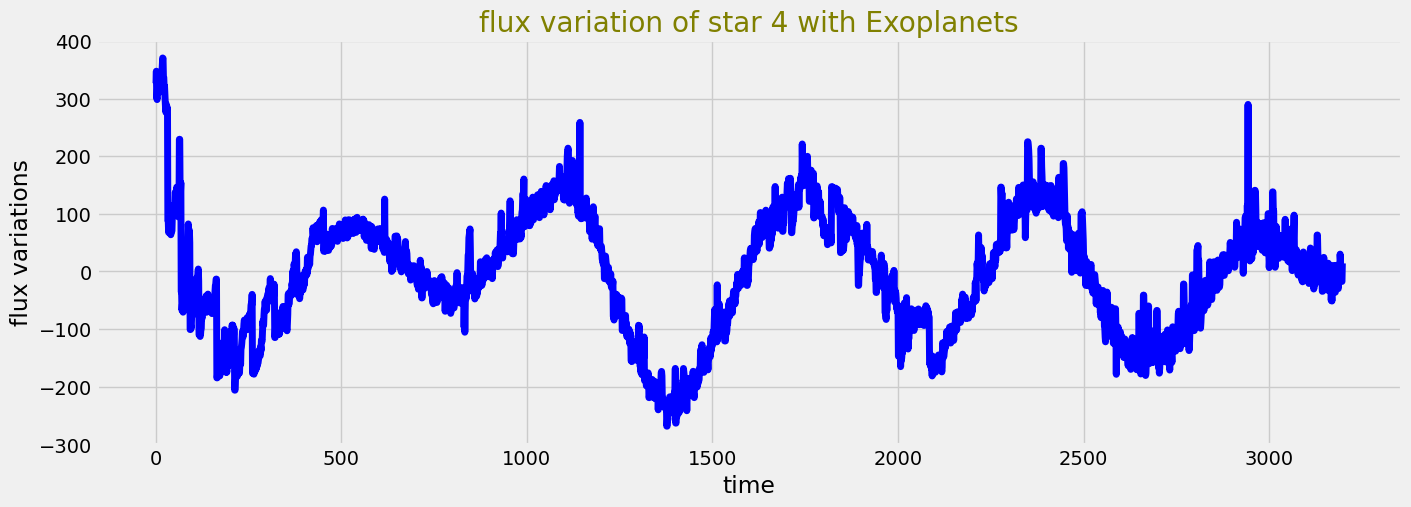

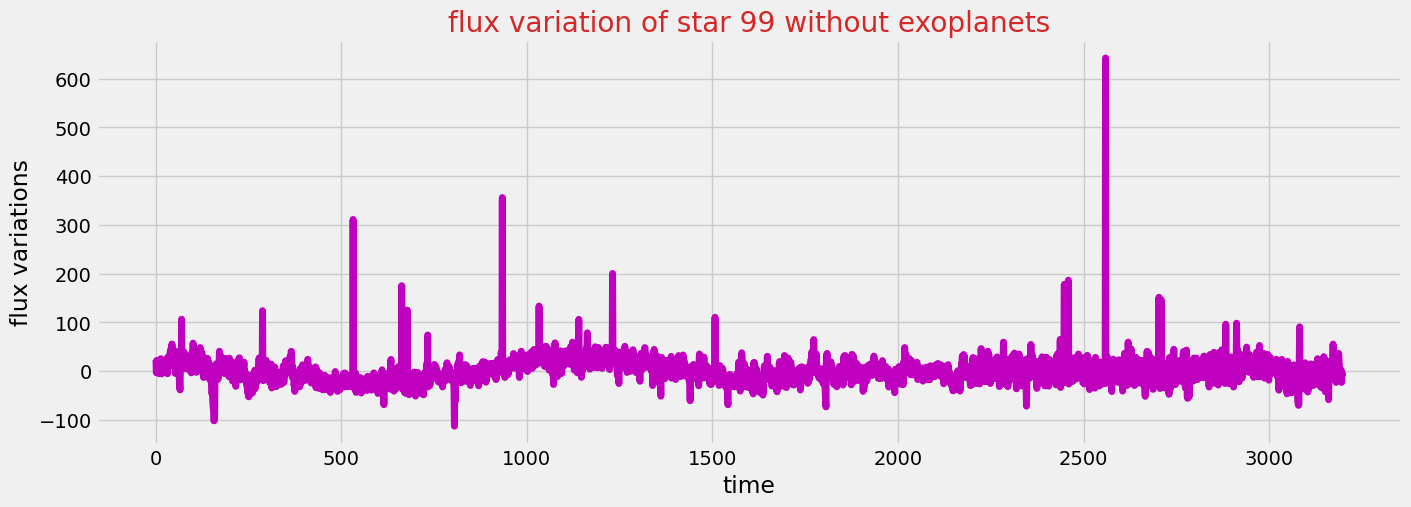

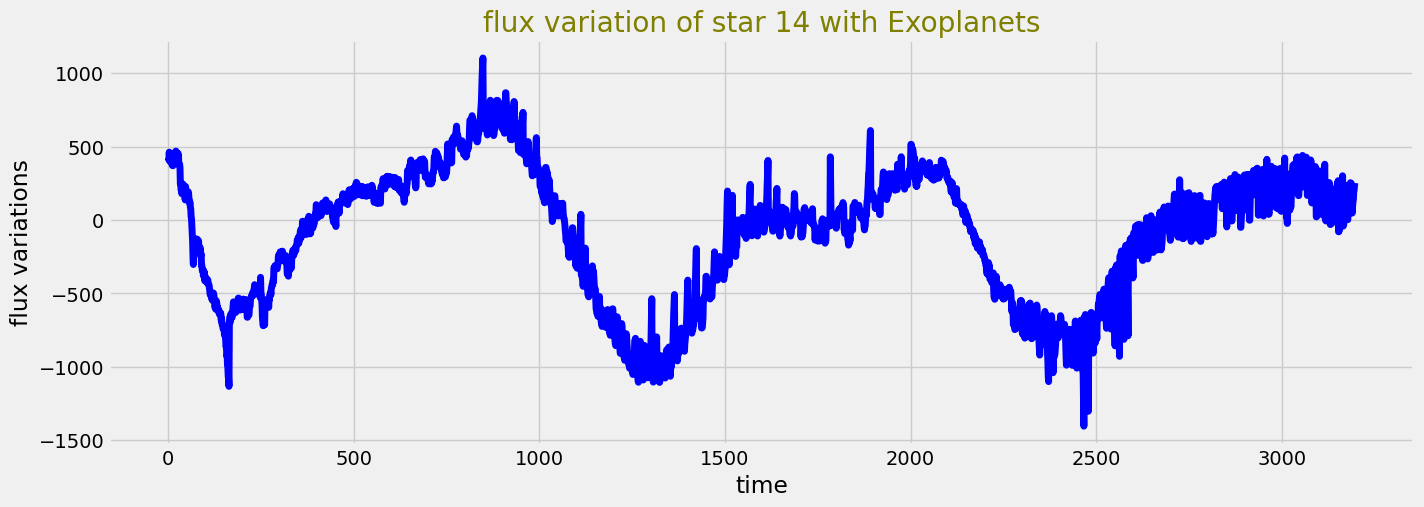

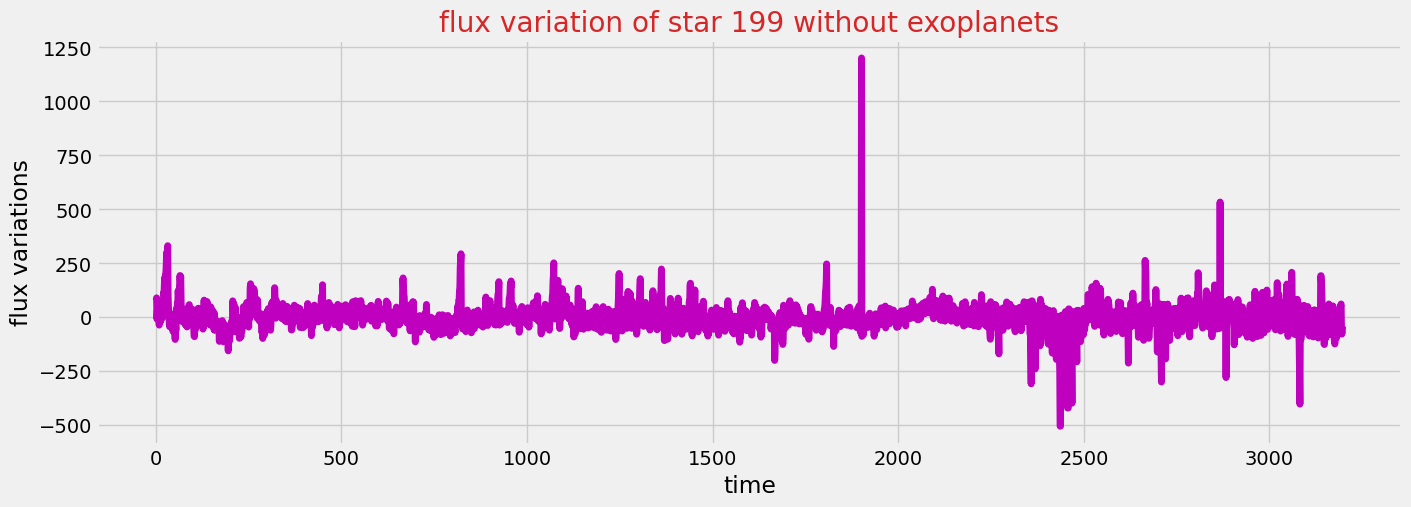

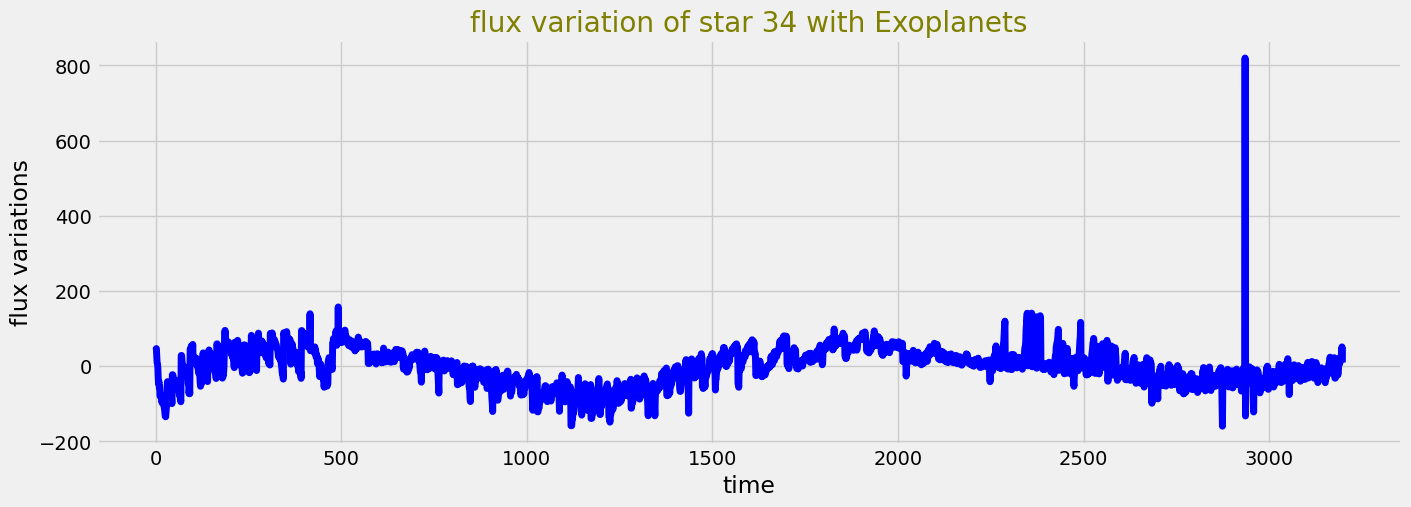

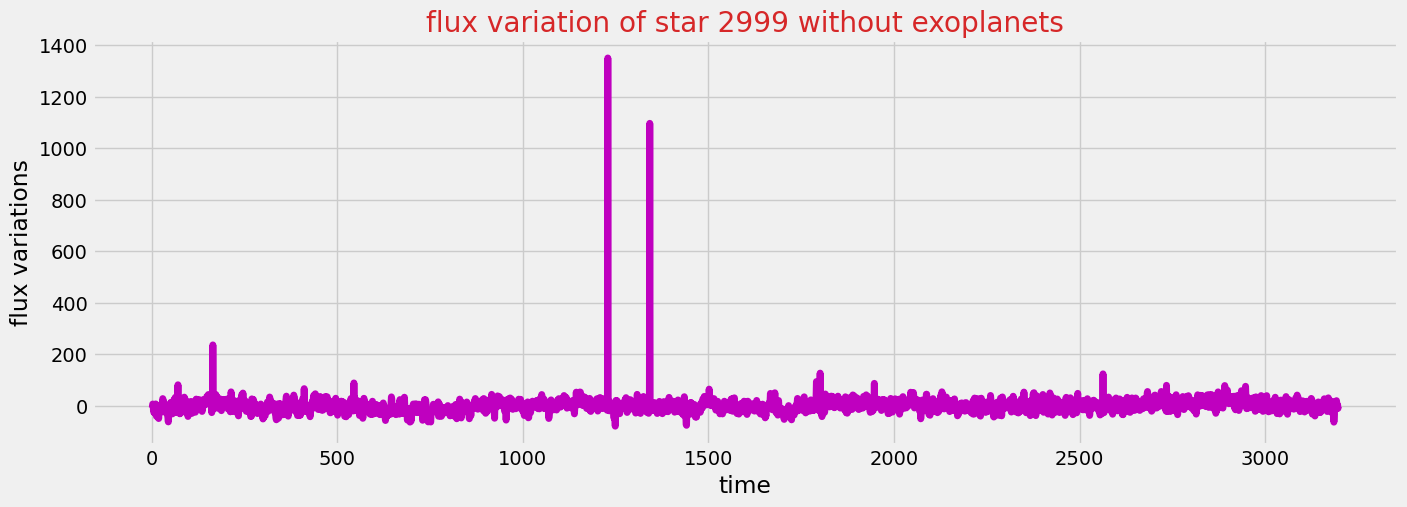

In [ ]:
#example of light curbes
exo, n_exo =[4,14,34],[99,199,2999]

for candidate in range(len(exo)):
  flux_plot(plot_df,exo[candidate],exo=True)
  flux_plot(plot_df,n_exo[candidate],exo=False)

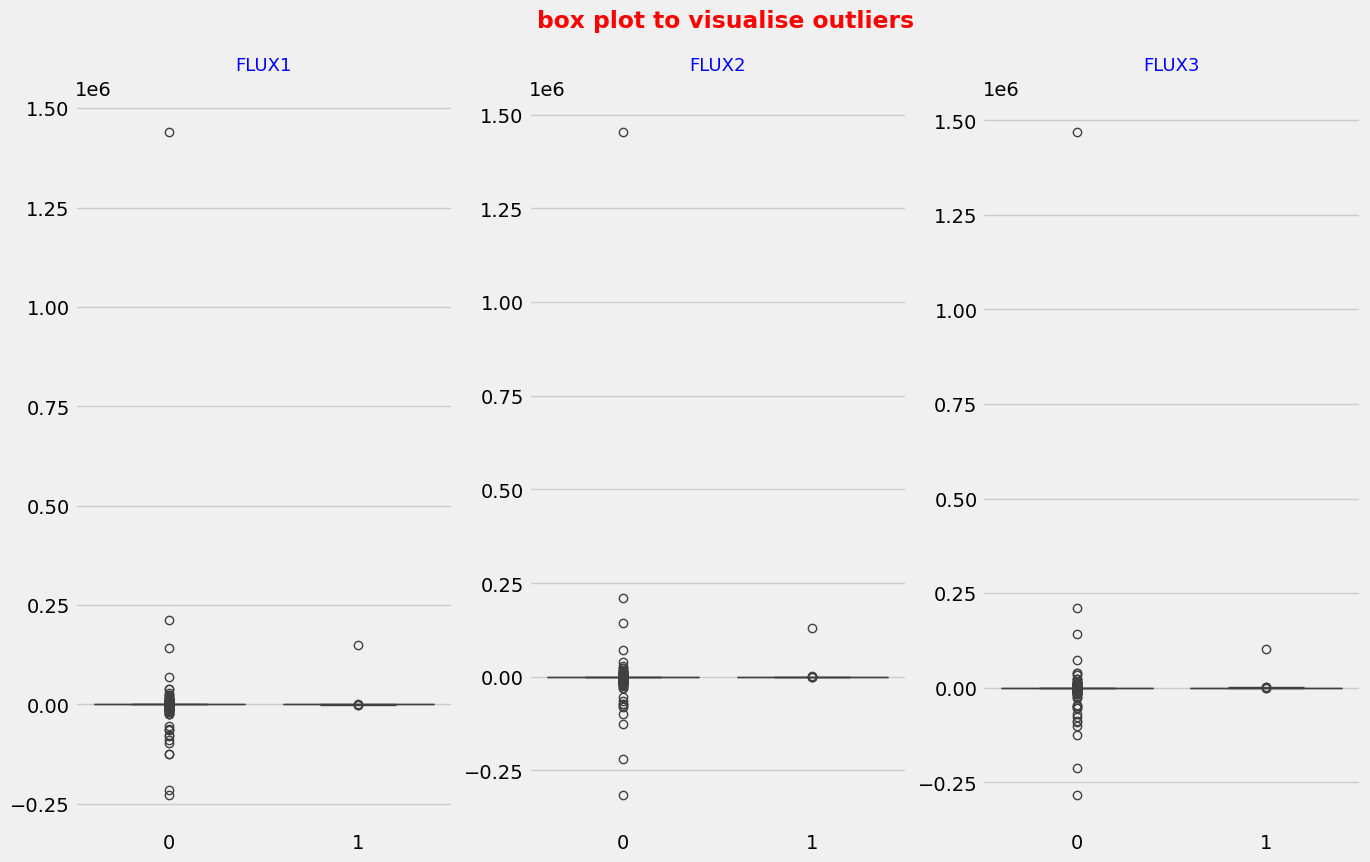

In [ ]:
#boxplot to visualise the outliers
plt.figure(figsize=(20,9))
plt.suptitle("box plot to visualise outliers", ha='right',color='red',weight='bold')
#loop to create multiple subplots
for i in range(1,4):
  plt.subplot(1,4,i)
  sns.boxplot(data=train_df,x='LABEL',y='FLUX.' + str(i))
  plt.xlabel("")
  plt.ylabel("")
  plt.title("FLUX" + str(i)+ "\n", color='b',fontsize=13)

In [ ]:
#get the extreme outliers
extreme_outliers = train_df[train_df['FLUX.2']>0.25e6]
print("dropping extreme outliers")
train_df.drop(extreme_outliers.index, axis=0,inplace=True)

print("done")


dropping extreme outliers
done


<Axes: xlabel='LABEL', ylabel='FLUX.819'>

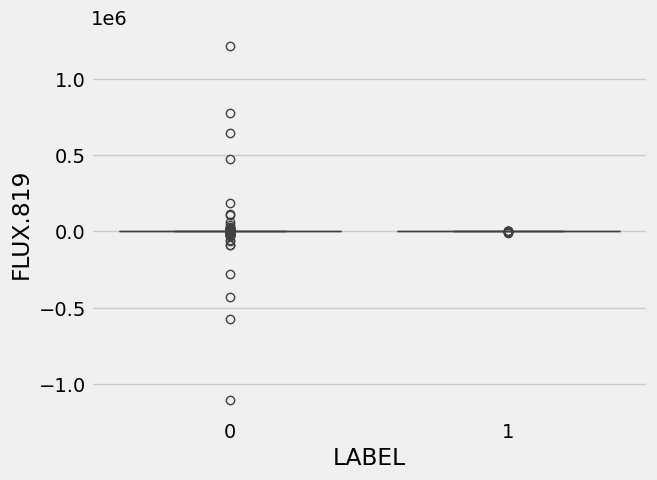

In [ ]:
#visualising a random boxplot after removal
sns.boxplot(data=train_df,x='LABEL',y='FLUX.' + str(np.random.randint(1000)))

In [ ]:
#Implementing KNN after handling the extreme outliers but have yet not balaced the data
#extracting dependent and independent variables
x= train_df.drop(['LABEL'],axis=1)
y = train_df.LABEL
print(f"take a look over \n X train array:\n{x.values}\n\n Y train array:\n{y.values}")

take a look over 
 X train array:
[[ 93.85  83.81  20.1  ...  61.42   5.08 -39.54]
 [-38.88 -33.83 -58.54 ...   6.46  16.    19.93]
 [532.64 535.92 513.73 ... -28.91 -70.02 -96.67]
 ...
 [273.39 278.   261.73 ...  88.42  79.07  79.43]
 [  3.82   2.09  -3.29 ... -14.55  -6.41  -2.55]
 [323.28 306.36 293.16 ... -16.72 -14.09  27.82]]

 Y train array:
[1 1 1 ... 0 0 0]


In [ ]:
#splitting of the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test =train_test_split(x,y,test_size =0.3,random_state=0)

In [ ]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)


In [ ]:
#checking the minimum, mean and maximum values after scalling
print("X_train after scaling ~\n")
print(f"Minimum:- {round(np.min(X_train_sc),2)}\nMean:- {round(np.mean(X_train_sc),2)}\nMax:- {round(np.max(X_train_sc), 2)}\n")
print("--------------------------------\n")
print("X_test after scaling ~\n")
print(f"Minimum:- {round(np.min(X_test_sc),2)}\nMean:- {round(np.mean(X_test_sc),2)}\nMax:- {round(np.max(X_test_sc), 2)}\n")


X_train after scaling ~

Minimum:- -57.1
Mean:- 0.0
Max:- 59.46

--------------------------------

X_test after scaling ~

Minimum:- -133.38
Mean:- 0.0
Max:- 112.18



In [ ]:
#importing KNN classifier
from sklearn.neighbors import KNeighborsClassifier as KNC
#initializing KNN Classifier
knn_classifier = KNC(n_neighbors=5, metric='minkowski', p=2)
#fitting the model
knn_classifier.fit(X_train_sc,y_train)
#making predictions
y_pred = knn_classifier.predict(X_test_sc)
#importing evaluation metrics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve,auc
#evaluating model performance
print('\nvalidation accuracy of KNN is', accuracy_score(y_test,y_pred))
print("\n----------------------------------------")
print('\nclassification report\n',(classification_report(y_test,y_pred)))



validation accuracy of KNN is 0.991480996068152

----------------------------------------

classification report
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      1513
           1       0.00      0.00      0.00        13

    accuracy                           0.99      1526
   macro avg       0.50      0.50      0.50      1526
weighted avg       0.98      0.99      0.99      1526



Text(0.5, 1.0, 'CONFUSION MATRIX')

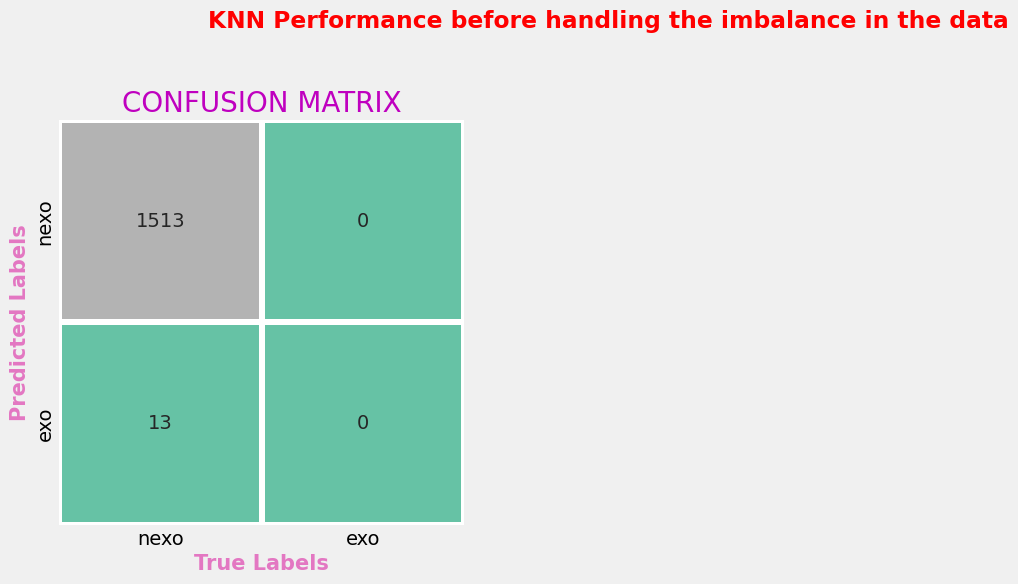

In [ ]:
#confusion matrix
plt.figure(figsize=(15,11))
plt.subplots_adjust(wspace=0.3)
plt.suptitle("KNN Performance before handling the imbalance in the data", color='r', weight='bold')
plt.subplot(221)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Set2", fmt="d", linewidths=3, cbar=False,
            xticklabels=['nexo', 'exo'], yticklabels=['nexo', 'exo'], square=True)
plt.xlabel("True Labels", fontsize=15, weight='bold', color='tab:pink')
plt.ylabel("Predicted Labels", fontsize=15, weight='bold', color='tab:pink')
plt.title("CONFUSION MATRIX", fontsize=20, color='m')


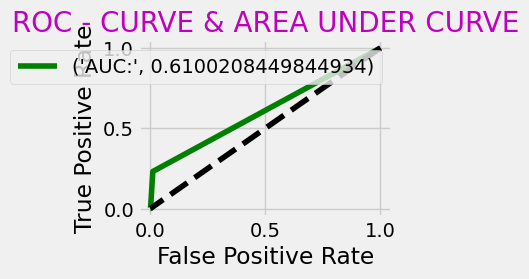

In [ ]:
#roc curve and auc
predicting_probabilites = knn_classifier.predict_proba(X_test_sc)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, predicting_probabilites)
plt.subplot(222)
plt.plot(fpr, tpr, label=("AUC:", auc(fpr, tpr)), color="g")
plt.plot([1, 0], [1, 0], "k--")
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC - CURVE & AREA UNDER CURVE", fontsize=20, color='m')
plt.show()


before sampling:- Counter({0: 5049, 1: 37})
after sampling:- Counter({1: 5049, 0: 5049})


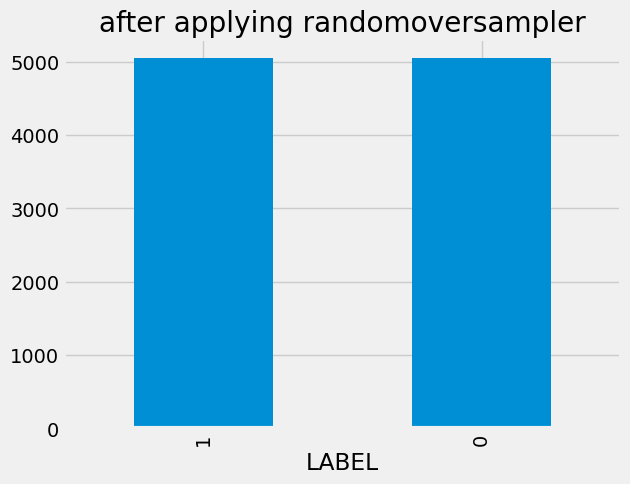

In [ ]:
#Handling the imbalance in the data and then applying KNN
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
#applying randomoversampler
ros= RandomOverSampler()
x_ros,y_ros= ros.fit_resample(x,y)
print(f"before sampling:- {Counter(y)}")
print(f"after sampling:- {Counter(y_ros)}")
y_ros.value_counts().plot(kind='bar',title='after applying randomoversampler')
#train test split
X_train,X_test,y_train,y_test = train_test_split(x_ros,y_ros,test_size=0.3,random_state=0)
#featurescalling
sc=StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [ ]:
# Create function to fetch the optimal value of K
def optimal_Kval_KNN(start_k, end_k, x_train, x_test, y_train, y_test, progress = True):
    '''
    This function takes in the following arguments -
    start_k - start value of k
    end_k - end value of k
    x_train - independent training values for training the KNN
    x_test - independent testing values for prediction
    y_train - dependent training values for training KNN
    y_test - dependent testing values for computing error rate
    progress - if true shows the progress for each k (by default its set to True)
    '''
    # Header
    print(f"Fetching the optimal value of K in between {start_k} & {end_k} ~\n\nIn progress...")

    # Empty list to append error rate
    mean_err = []
    for K in range(start_k, end_k + 1):                         # Generates K from start to end-1 values
        knn = KNC(n_neighbors = K)                              # Build KNN for respective K value
        knn.fit(x_train, y_train)                               # Train the model
        err_rate = np.mean(knn.predict(x_test) != y_test)       # Get the error rate
        mean_err.append(err_rate)                               # Append it
        # If progress is true display the error rate for each K
        if progress == True:print(f'For K = {K}, mean error = {err_rate:.3}')

    # Get the optimal value of k and corresponding value of mean error
    k, val = mean_err.index(min(mean_err))+1, min(mean_err)

    # Footer
    print('\nDone! Here is how error rate varies wrt to K values:- \n')

    # Display how error rate changes wrt K values and mark the optimal K value
    plt.figure(figsize = (5,5))
    plt.plot(range(start_k,end_k + 1), mean_err, 'mo--', markersize = 8, markerfacecolor = 'c',
            linewidth = 1)          # plots all mean error wrt K values
    plt.plot(k, val, marker = 'o', markersize = 8, markerfacecolor = 'gold',
             markeredgecolor = 'g') # highlits the optimal K
    plt.title(f"The optimal performance is obtained at K = {k}", color = 'r', weight = 'bold',
             fontsize = 15)
    plt.ylabel("Error Rate", color = 'olive', fontsize = 13)
    plt.xlabel("K values", color = 'olive', fontsize = 13)

    '''returns the optimal value of k'''
    return k

Fetching the optimal value of K in between 1 & 10 ~

In progress...
For K = 1, mean error = 0.00132
For K = 2, mean error = 0.00132
For K = 3, mean error = 0.00264
For K = 4, mean error = 0.00264
For K = 5, mean error = 0.00462
For K = 6, mean error = 0.00462
For K = 7, mean error = 0.00528
For K = 8, mean error = 0.00528
For K = 9, mean error = 0.00792
For K = 10, mean error = 0.00792

Done! Here is how error rate varies wrt to K values:- 



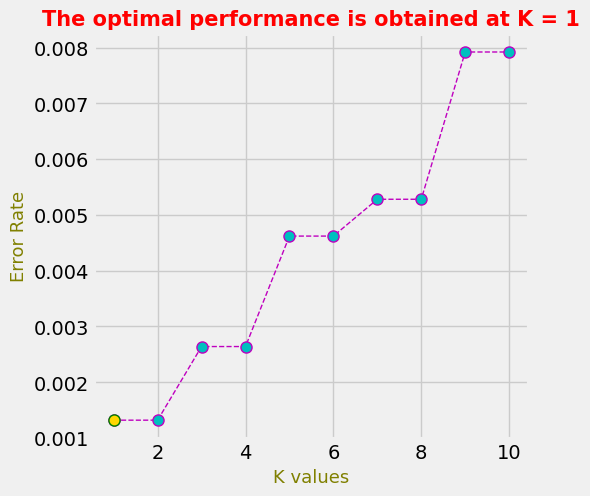

In [ ]:
k = optimal_Kval_KNN(1, 10, X_train_sc, X_test_sc, y_train, y_test)


Validation accuracy of KNN is 0.9986798679867986

-------------------------------------------------------

Classification report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1512
           1       1.00      1.00      1.00      1518

    accuracy                           1.00      3030
   macro avg       1.00      1.00      1.00      3030
weighted avg       1.00      1.00      1.00      3030



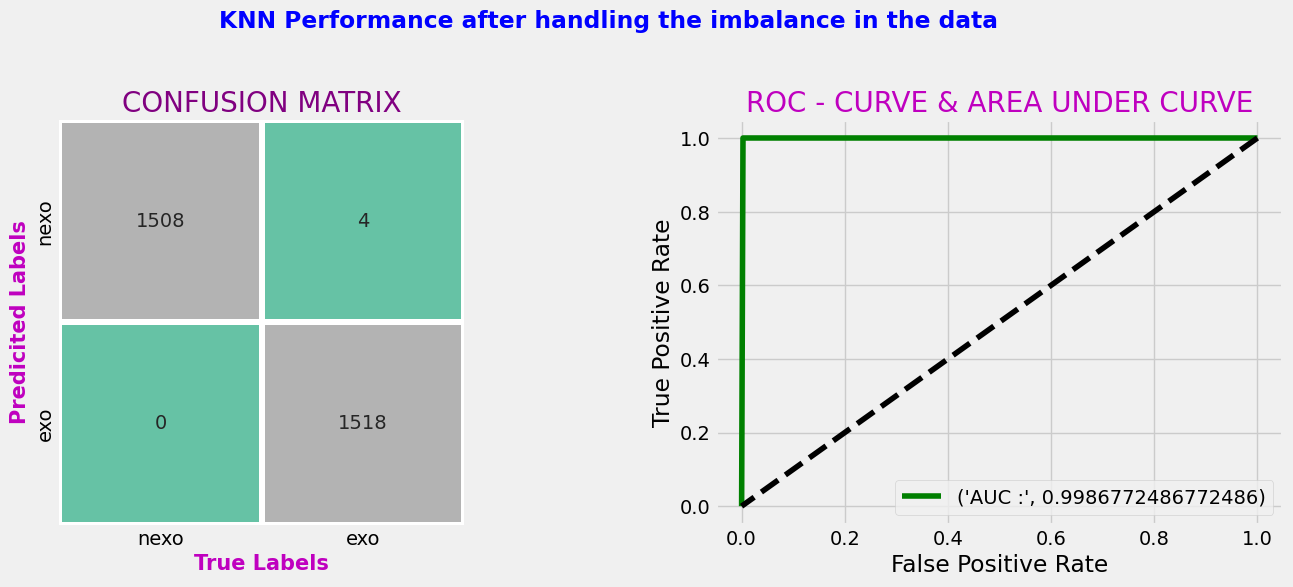

In [ ]:
# Fiting the KNN Classifier Model on to the training data after

# Choosing K = 1
knn_classifier = KNC(n_neighbors=1,metric='minkowski',p=2)
'''metric is to be by default minkowski for p = 2 to calculate the Eucledian distances'''

# Fit the model
knn_classifier.fit(X_train_sc, y_train)

# Predict
y_pred = knn_classifier.predict(X_test_sc)

# Results
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, auc

print('\nValidation accuracy of KNN is', accuracy_score(y_test,y_pred))
print("\n-------------------------------------------------------")
print ("\nClassification report :\n",(classification_report(y_test,y_pred)))

#Confusion matrix
plt.figure(figsize=(15,11))
plt.subplots_adjust(wspace = 0.3)
plt.suptitle("KNN Performance after handling the imbalance in the data", color = 'b', weight = 'bold')
plt.subplot(221)
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap="Set2",fmt = "d",linewidths=3, cbar = False,
           xticklabels=['nexo', 'exo'], yticklabels=['nexo','exo'], square = True)
plt.xlabel("True Labels", fontsize = 15, weight = 'bold', color = 'm')
plt.ylabel("Predicited Labels", fontsize = 15, weight = 'bold', color = 'm')
plt.title("CONFUSION MATRIX",fontsize=20, color = 'purple')

#ROC curve and Area under the curve plotting
predicting_probabilites = knn_classifier.predict_proba(X_test_sc)[:,1]
fpr,tpr,thresholds = roc_curve(y_test,predicting_probabilites)
plt.subplot(222)
plt.plot(fpr,tpr,label = ("AUC :",auc(fpr,tpr)),color = "g")
plt.plot([1,0],[1,0], 'k--')
plt.legend(loc = "best")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC - CURVE & AREA UNDER CURVE",fontsize=20, color = 'm')
plt.show()

Is this model working well for unseen data (test set)? Try it yourself!


In [ ]:
#evaluating knn on test data
from sklearn.metrics import accuracy_score, classification_report

# Assuming you already have your test set features (X_test) and labels (y_test)
y_pred_knn = knn_classifier.predict(X_test)

# Evaluate KNN performance
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("KNN Accuracy:", accuracy_knn)
print("Classification Report for KNN:\n", classification_report(y_test, y_pred_knn))


KNN Accuracy: 0.5158415841584159
Classification Report for KNN:
               precision    recall  f1-score   support

           0       0.51      0.98      0.67      1512
           1       0.73      0.05      0.10      1518

    accuracy                           0.52      3030
   macro avg       0.62      0.52      0.38      3030
weighted avg       0.62      0.52      0.38      3030



NO it doesnt

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest model
rf_model = RandomForestClassifier(n_estimators=100)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)
print("Classification Report for Random Forest:\n", classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 1.0
Classification Report for Random Forest:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1512
           1       1.00      1.00      1.00      1518

    accuracy                           1.00      3030
   macro avg       1.00      1.00      1.00      3030
weighted avg       1.00      1.00      1.00      3030



In [ ]:
from sklearn.svm import SVC

# Initialize SVM model
svm_model = SVC()

# Train the model
svm_model.fit(X_train, y_train)

# Predict on the test set
y_pred_svm = svm_model.predict(X_test)

# Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", accuracy_svm)
print("Classification Report for SVM:\n", classification_report(y_test, y_pred_svm))


SVM Accuracy: 0.5468646864686468
Classification Report for SVM:
               precision    recall  f1-score   support

           0       0.52      0.99      0.69      1512
           1       0.95      0.10      0.18      1518

    accuracy                           0.55      3030
   macro avg       0.74      0.55      0.43      3030
weighted avg       0.74      0.55      0.43      3030

